In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [14]:
datasets=pd.read_csv(r"C://Users//basit//Downloads//Social_Network_Ads.csv")
datasets

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [4]:
datasets.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
datasets.drop("User ID", axis=1)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
x=datasets.iloc[:,:-1]
y=datasets["Purchased"]

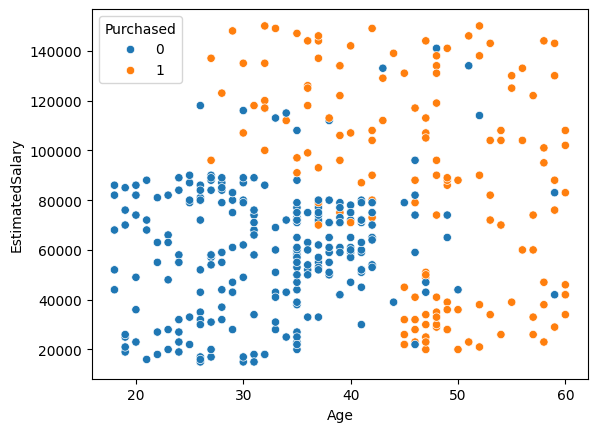

In [16]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=datasets,hue="Purchased")
plt.show()

In [19]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [20]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.score(x_test,y_test)*100

91.25

In [35]:
knn.score(x_train,y_train)*100

92.5

In [36]:
#for i in range(1,30) :
    #knn1= KNeighborsClassifier(n_neighbors=i)
   # knn1.fit(x_train,y_train)
    #print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

C:\Users\basit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

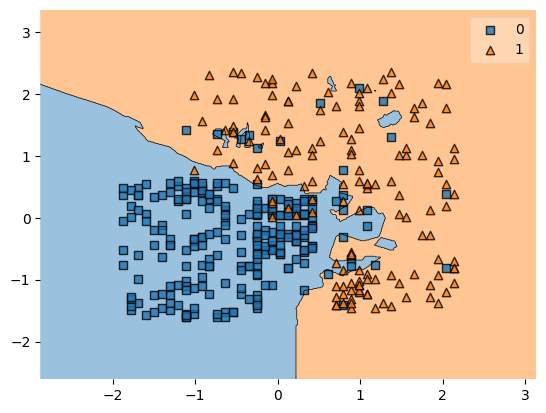

In [38]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show